#importing necessery libraries

In [124]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import  mean_squared_error, mean_absolute_error

import datetime
import operator

plt.style.use('fivethirtyeight')
%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Reading and Preprocessing Datasets

In [ ]:
confirmed_cases = pd.read_csv('/content/sample_data/datasets/time_series_covid19_confirmed_global.csv')

In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458


In [ ]:
deaths_reported = pd.read_csv('/content/sample_data/datasets/time_series_covid19_deaths_global.csv')

In [ ]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23


In [ ]:
recovered_cases = pd.read_csv('/content/sample_data/datasets/time_series_covid19_recovered_global.csv')

In [ ]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117


In [ ]:
latest_data = pd.read_csv('/content/sample_data/datasets/07-10-2020.csv')

In [ ]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-11 04:34:26,34.223334,-82.461707,141,1,0,140.0,"Abbeville, South Carolina, US",574.876667,0.709220
1,22001.0,Acadia,Louisiana,US,2020-07-11 04:34:26,30.295065,-92.414197,1232,44,0,1188.0,"Acadia, Louisiana, US",1985.655573,3.571429
2,51001.0,Accomack,Virginia,US,2020-07-11 04:34:26,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-11 04:34:26,43.452658,-116.241552,3790,25,0,3765.0,"Ada, Idaho, US",786.981376,0.659631
4,19001.0,Adair,Iowa,US,2020-07-11 04:34:26,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [ ]:
#fetching all the columns for confirmed cases

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/1/20', '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20', '7/7/20',
       '7/8/20', '7/9/20', '7/10/20'],
      dtype='object', length=175)

In [ ]:
#exttracting dates
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [ ]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380
263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314
264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457


# Creating empty arrays to sort and place data

In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
india_cases = []
bangladesh_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
india_deaths = []
bangladesh_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
india_recoveries = []
bangladesh_recoveries = []

In [ ]:
for i in dates:
  confirmed_sum = confirmed[i].sum()
  death_sum = deaths[i].sum()
  recovered_sum = recoveries[i].sum()
  
  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  total_recovered.append(recovered_sum)
  total_active.append(confirmed_sum-death_sum-recovered_sum)

  mortality_rate.append(death_sum/confirmed_sum)
  recovery_rate.append(recovered_sum/confirmed_sum)

  china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
  italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
  us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
  spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
  france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
  germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
  uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
  russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
  india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
  bangladesh_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Bangladesh'][i].sum())

  china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
  italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
  us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
  spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
  france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
  germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
  uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
  russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
  india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  bangladesh_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Bangladesh'][i].sum())

  china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
  italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
  us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
  spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
  france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
  germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
  uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
  russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
  india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
  bangladesh_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Bangladesh'][i].sum())

# Total cases , total deaths, total recoveries reported globally 
# &
# summation of these cases globally

In [ ]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78979,
 79543,
 80396,
 81373,
 82737,
 84114,
 86009,
 88386,
 90360,
 92938,
 95237,
 98028,
 101971,
 106009,
 109960,
 113860,
 118884,
 126547,
 132297,
 146704,
 157795,
 168941,
 183597,
 199434,
 219028,
 246949,
 276534,
 308842,
 342255,
 384420,
 425559,
 476376,
 539336,
 603736,
 671344,
 730921,
 795560,
 871976,
 948197,
 1029598,
 1112752,
 1193128,
 1264846,
 1337518,
 1414391,
 1498166,
 1584791,
 1672449,
 1749169,
 1845951,
 1915545,
 1985472,
 2066301,
 2163013,
 2250737,
 2324083,
 2404790,
 2478129,
 2553289,
 2630185,
 2719198,
 2806138,
 2890259,
 2963206,
 3031926,
 3107209,
 3184143,
 3267936,
 3354984,
 3435571,
 3513207,
 3589284,
 3669273,
 3759295,
 3848381,
 3939898,
 4023533,
 4099779,
 4176020,
 4259383,
 4344370

In [ ]:
#total deaths reported globally
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7955,
 8852,
 9958,
 11436,
 13142,
 14840,
 16757,
 19027,
 21803,
 24810,
 28328,
 32007,
 35480,
 39644,
 44488,
 50042,
 56347,
 62332,
 68173,
 73194,
 79026,
 86928,
 93663,
 101285,
 108557,
 114625,
 120356,
 126103,
 132999,
 141311,
 148594,
 157484,
 163942,
 168525,
 173968,
 181120,
 187879,
 194729,
 201402,
 206980,
 210863,
 215510,
 221973,
 228736,
 234703,
 239879,
 245204,
 248657,
 252785,
 258655,
 265321,
 270729,
 276296,
 280562,
 284127,
 287599,
 293140,
 298369,
 303637,
 308852,
 313011,
 316340,
 319631,
 324412,
 329286,
 334077,
 339354,
 343342,
 346159,
 347336,
 351537,
 356719,
 361392,
 366076,


In [ ]:
#confirmed cases
confirmed_sum

12498467

In [ ]:
#summation of death globally
death_sum

560209

In [ ]:
#summation of recoveries globally
recovered_sum

6879521

In [ ]:
#total cases in theese countries so far
china_cases
us_cases
india_cases
bangladesh_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 8,
 10,
 14,
 17,
 20,
 25,
 27,
 33,
 39,
 39,
 44,
 48,
 48,
 48,
 49,
 51,
 54,
 56,
 61,
 70,
 88,
 123,
 164,
 218,
 330,
 424,
 482,
 621,
 803,
 1012,
 1231,
 1572,
 1838,
 2144,
 2456,
 2948,
 3382,
 3772,
 4186,
 4689,
 4998,
 5416,
 5913,
 6462,
 7103,
 7667,
 8238,
 8790,
 9455,
 10143,
 10929,
 11719,
 12425,
 13134,
 13770,
 14657,
 15691,
 16660,
 17822,
 18863,
 20065,
 20995,
 22268,
 23870,
 25121,
 26738,
 28511,
 30205,
 32078,
 33610,
 35585,
 36751,
 38292,
 40321,
 42844,
 44608,
 47153,
 49534,
 52445,
 55140,
 57563,
 60391,
 63026,
 65769,
 68504,
 71675,
 74865,
 78052,
 81523,
 84379,
 87520,
 90619,
 94481,
 98489,
 102292,
 105535,
 108775,
 112306,
 115786,
 119198,
 122660,
 126606,
 130474,
 133978,
 137787,
 141801,
 145483,
 149258,
 15327

# Finding daily increase of covid-19 cases in these countries and world



1.   China
2.   Italy
3.   United States
4.   Spain
5.   France
6.   Germany
7.   United Kingdom
8.   India
9.   Bangladesh



In [ ]:
#analyzing for finding out daily increasing case amount

def daily_increase(data):
  d = []
  for i in range(len(data)):
    if i == 0:
      d.append(data[0])
    else:
      d.append(data[i]-data[i-1])
  return d    

In [ ]:
#case increase daily
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)
bangladesh_daily_increase = daily_increase(bangladesh_cases)

In [ ]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594,
 661,
 849,
 643,
 515,
 0,
 908,
 431,
 518,
 482,
 1787,
 466,
 482,
 -372,
 859,
 0,
 1647,
 658,
 664,
 251,
 159,
 294,
 394,
 334,
 318,
 332,
 240,
 167,
 249,
 314,
 427,
 502,
 396,
 323,
 181,
 219,
 355,
 585,
 307,
 363,
 334,
 232,
 248,
 334,
 400,
 419,
 564,
 301,
 200,
 301,
 388,
 444,
 442,
 0,
 0,
 1244,
 341,
 383,
 543,
 852]

In [ ]:
bangladesh_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 2,
 4,
 3,
 3,
 5,
 2,
 6,
 6,
 0,
 5,
 4,
 0,
 0,
 1,
 2,
 3,
 2,
 5,
 9,
 18,
 35,
 41,
 54,
 112,
 94,
 58,
 139,
 182,
 209,
 219,
 341,
 266,
 306,
 312,
 492,
 434,
 390,
 414,
 503,
 309,
 418,
 497,
 549,
 641,
 564,
 571,
 552,
 665,
 688,
 786,
 790,
 706,
 709,
 636,
 887,
 1034,
 969,
 1162,
 1041,
 1202,
 930,
 1273,
 1602,
 1251,
 1617,
 1773,
 1694,
 1873,
 1532,
 1975,
 1166,
 1541,
 2029,
 2523,
 1764,
 2545,
 2381,
 2911,
 2695,
 2423,
 2828,
 2635,
 2743,
 2735,
 3171,
 3190,
 3187,
 3471,
 2856,
 3141,
 3099,
 3862,
 4008,
 3803,
 3243,
 3240,
 3531,
 3480,
 3412,
 3462,
 3946,
 3868,
 3504,
 3809,
 4014,
 3682,
 3775,
 4019,
 3114,
 3288,
 2738,
 3201,
 3027,
 3489,
 3360,
 2949]

In [ ]:
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3100,
 4011,
 3745,
 3159,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2142,
 2184,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 378,
 564,
 853,
 977,
 1364,
 1377,
 1895,
 2377,
 1974,
 2578,
 2299,
 2791,
 3943,
 4038,
 3951,
 3900,
 5024,
 7663,
 5750,
 14407,
 11091,
 11146,
 14656,
 15837,
 19594,
 27921,
 29585,
 32308,
 33413,
 42165,
 41139,
 50817,
 62960,
 64400,
 67608,
 59577,
 64639,
 76416,
 76221,
 81401,
 83154,
 80376,
 71718,
 72672,
 76873,
 83775,
 86625,
 87658,
 76720,
 96782,
 69594,
 69927,
 80829,
 96712,
 87724,
 73346,
 80707,
 73339,
 75160,
 76896,
 89013,
 86940,
 84121,
 72947,
 68720,
 75283,
 76934,
 83793,
 87048,
 80587,
 77636,
 76077,
 79989,
 90022,
 89086,
 91517,
 83635,
 76246,
 76241,
 83363,
 84987,
 97105,
 96349,
 91813,
 78509,
 88284,
 96424,
 102842,
 106520,
 106900,
 98983,
 95326,
 86963,
 92522,
 102600,
 118089,
 121110,
 128425,
 107109,
 96250,
 1

In [ ]:
china_daily_increase

[548,
 95,
 277,
 486,
 669,
 802,
 2632,
 578,
 2054,
 1661,
 2089,
 4739,
 3086,
 3991,
 3733,
 3147,
 3523,
 2704,
 3015,
 2525,
 2032,
 373,
 15136,
 6463,
 2055,
 2100,
 1921,
 1777,
 408,
 458,
 473,
 1451,
 21,
 219,
 513,
 412,
 434,
 328,
 428,
 576,
 204,
 125,
 125,
 151,
 153,
 80,
 53,
 37,
 27,
 34,
 11,
 13,
 32,
 26,
 30,
 25,
 44,
 54,
 94,
 55,
 130,
 63,
 93,
 70,
 121,
 115,
 102,
 123,
 76,
 81,
 82,
 71,
 79,
 32,
 59,
 63,
 53,
 91,
 74,
 58,
 73,
 120,
 79,
 93,
 50,
 47,
 357,
 27,
 18,
 12,
 36,
 15,
 16,
 15,
 10,
 3,
 6,
 22,
 4,
 12,
 3,
 0,
 5,
 2,
 2,
 2,
 5,
 1,
 14,
 20,
 1,
 7,
 6,
 5,
 9,
 6,
 10,
 9,
 0,
 0,
 0,
 18,
 3,
 11,
 7,
 1,
 3,
 0,
 17,
 5,
 18,
 8,
 7,
 -1,
 11,
 6,
 9,
 5,
 4,
 3,
 11,
 7,
 12,
 58,
 49,
 43,
 44,
 36,
 36,
 0,
 59,
 19,
 52,
 29,
 20,
 28,
 24,
 18,
 14,
 23,
 5,
 31,
 14,
 8,
 19,
 14,
 18,
 28,
 33,
 42,
 0]

In [ ]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [ ]:
#deaths

world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)
bangladesh_daily_death = daily_increase(bangladesh_deaths)

In [ ]:
world_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 93,
 112,
 99,
 244,
 184,
 279,
 345,
 305,
 497,
 417,
 641,
 680,
 804,
 897,
 1106,
 1478,
 1706,
 1698,
 1917,
 2270,
 2776,
 3007,
 3518,
 3679,
 3473,
 4164,
 4844,
 5554,
 6305,
 5985,
 5841,
 5021,
 5832,
 7902,
 6735,
 7622,
 7272,
 6068,
 5731,
 5747,
 6896,
 8312,
 7283,
 8890,
 6458,
 4583,
 5443,
 7152,
 6759,
 6850,
 6673,
 5578,
 3883,
 4647,
 6463,
 6763,
 5967,
 5176,
 5325,
 3453,
 4128,
 5870,
 6666,
 5408,
 5567,
 4266,
 3565,
 3472,
 5541,
 5229,
 5268,
 5215,
 4159,
 3329,
 3291,
 4781,
 4874,
 4791,
 5277,
 3988,
 2817,
 1177,
 4201,
 5182,
 4673,
 4684,
 4135,
 2867,
 3530,
 4699,
 5706,
 5148,
 4822,
 3818,
 2749,
 3756,
 4855,
 5205,
 4784,
 4295,
 4250,
 3346,
 3504,
 6789,
 5271,
 5009,
 6269,
 4268,
 4057,
 3571,
 5424,
 5174,
 6551,
 4

In [ ]:
china_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 102,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 252,
 152,
 142,
 103,
 98,
 139,
 113,
 122,
 0,
 205,
 2,
 150,
 70,
 52,
 29,
 44,
 47,
 35,
 42,
 33,
 36,
 32,
 29,
 28,
 28,
 23,
 16,
 22,
 11,
 8,
 13,
 10,
 14,
 13,
 11,
 8,
 4,
 6,
 15,
 0,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 1,
 7,
 6,
 4,
 4,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 1290,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
us_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 5,
 10,
 9,
 6,
 12,
 27,
 34,
 57,
 77,
 97,
 94,
 145,
 183,
 237,
 312,
 413,
 554,
 634,
 627,
 820,
 1224,
 1241,
 1586,
 1315,
 1284,
 1439,
 1668,
 2309,
 2116,
 2075,
 2093,
 2046,
 1771,
 1828,
 2404,
 2549,
 2113,
 2614,
 2386,
 1229,
 1795,
 2453,
 2393,
 2437,
 2118,
 1650,
 1293,
 1423,
 2221,
 2501,
 2301,
 1869,
 1556,
 1096,
 1309,
 2307,
 2458,
 1919,
 1727,
 1479,
 879,
 1013,
 1612,
 1754,
 1774,
 1661,
 1223,
 752,
 770,
 1551,
 1563,
 1228,
 1269,
 1121,
 608,
 513,
 685,
 1509,
 1182,
 1166,
 964,
 591,
 772,
 1033,
 990,
 1009,
 970,
 680,
 451,
 505,
 940,
 917,
 881,
 822,
 750,
 298,
 391,
 839,
 751,
 704,
 672,
 610,
 255,
 406,
 837,
 757,
 2422,
 605,
 489,
 240,
 351,
 721,
 673,
 698,
 639,
 247,
 271,
 325,
 1195,
 820,
 990,
 802]

In [ ]:
#recoveries

world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)
bangladesh_daily_recovery = daily_increase(bangladesh_recoveries)

In [ ]:
world_daily_recovery

[28,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1321,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4264,
 6215,
 465,
 9639,
 5783,
 8365,
 8769,
 8494,
 9467,
 15437,
 13486,
 15090,
 17041,
 15447,
 20413,
 13839,
 16633,
 23388,
 28716,
 25336,
 21819,
 26247,
 19403,
 27166,
 25093,
 36667,
 30828,
 26120,
 23923,
 31654,
 22002,
 34827,
 30429,
 28791,
 50033,
 27779,
 28603,
 27803,
 33266,
 42168,
 64971,
 38231,
 40917,
 32323,
 34064,
 36605,
 45918,
 39497,
 36522,
 53549,
 33594,
 46994,
 37035,
 55842,
 39735,
 47989,
 56591,
 40886,
 52898,
 52165,
 58913,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77327,
 70472,
 76308,
 54895,
 104123,
 79142,
 70029,
 69156,
 72202,
 55093,
 1

In [ ]:
bangladesh_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 4,
 0,
 4,
 0,
 4,
 6,
 0,
 0,
 1,
 4,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 7,
 0,
 9,
 8,
 9,
 10,
 2,
 5,
 16,
 4,
 1,
 9,
 9,
 8,
 11,
 10,
 14,
 3,
 886,
 146,
 194,
 0,
 507,
 191,
 313,
 236,
 252,
 245,
 214,
 0,
 521,
 235,
 256,
 212,
 408,
 214,
 395,
 588,
 296,
 415,
 433,
 245,
 346,
 500,
 590,
 360,
 406,
 816,
 523,
 470,
 571,
 643,
 521,
 578,
 657,
 777,
 563,
 847,
 502,
 579,
 902,
 1,
 17533,
 1925,
 1975,
 2781,
 1048,
 1084,
 1678,
 880,
 2031,
 1829,
 1638,
 1185,
 1409,
 2053,
 1844,
 2484,
 4334,
 1606,
 2673,
 1904,
 3524,
 1953,
 2736,
 3706,
 1862]

# Country wise covid-19 cases



1.   Finding Unique country names from datasets
2.   Creating emty arrays to put to sort and put datas into confirmed cases, deaths, active cases, recoveries, mortality rate.



In [ ]:
#listing countries

unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [ ]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []
for i in unique_countries:
  cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
  if cases > 0:
    country_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_countries.remove(i)

#sorting countries by number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=(1))]
for i in range(len(unique_countries)):
  country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
  country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
  country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
  country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
  country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [ ]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                           'Number of Deaths': country_death_cases, 'Number of Recoveries': country_recovery_cases,
                           'Number of Active Cases': country_active_cases,
                           'Mortality Rate': country_mortality_rate})

#number of cases per country

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3184573,134092,983185,2067296,0.042107
1,Brazil,1800827,70398,1217361,513068,0.039092
2,India,820916,22123,515386,283407,0.026949
3,Russia,712863,11000,488234,213629,0.015431
4,Peru,319646,11500,210638,97508,0.035977
5,Chile,309274,6781,278053,24440,0.021926
6,United Kingdom,289678,44735,1378,243565,0.154430
7,Mexico,289174,34191,225356,29627,0.118237
8,Spain,253908,28403,150376,75129,0.111863
9,Iran,252720,12447,215015,25258,0.049252


# Province wise covid-19 cases


1.   Finding unique provinces from the datasets
2.   Creating empty arrays to sort datas into province name, confirmed cases,  death cases, recovery cases, mortality rate



In [ ]:
unique_provinces = list(latest_data['Province_State'].unique())

In [ ]:
province_confirmed_cases = []
province_country = []
province_death_cases = []
province_recovery_cases = []
province_mortality_rate = []

no_cases = []
for i in unique_provinces:
  cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
  if cases > 0:
    province_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

#removing areas with no cases
for i in no_cases:
  unique_provinces.remove(i)

unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=(1))]
for i in range(len(unique_provinces)):
  province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
  province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])     
  province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
  province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
  province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])   

In [ ]:
#number of cases per province
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                            'Number of Deaths': province_death_cases, 'Number of Recoveries': province_recovery_cases,
                            'Mortality Rate': province_mortality_rate})

province_df.style.background_gradient(cmap='Reds')

# Dealing with missing values

In [ ]:
#dealing with missing values
nan_indices = []

#handling nan is there's any
for i in range(len(unique_provinces)):
  if type(unique_provinces[i]) == float:
    nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_cases.pop(i)

# Coparison of number of covid-19 cases between USA and other countries

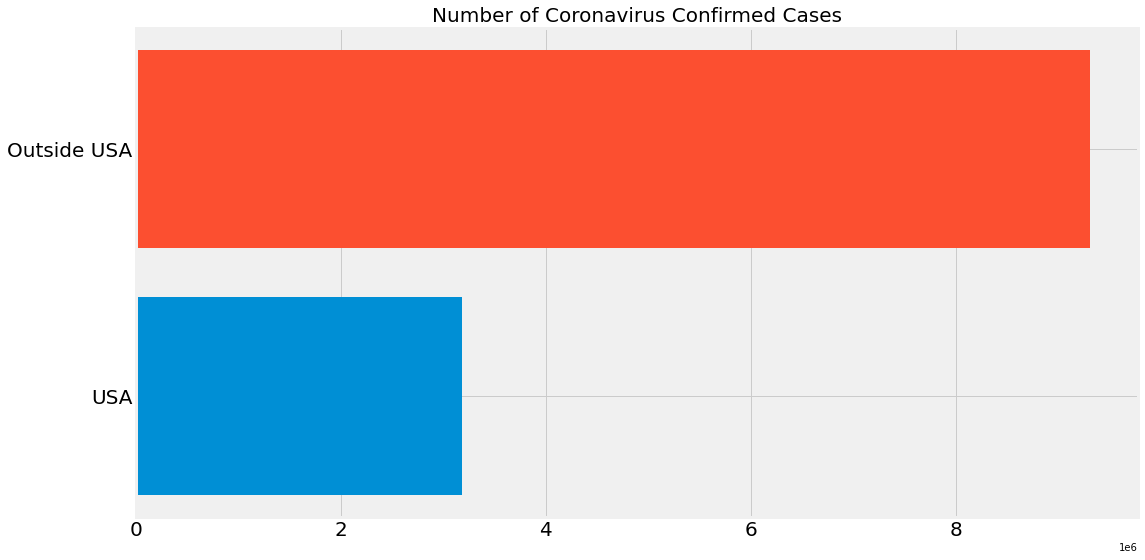

In [ ]:
#comparing cases between US and outside US
#Because USA has the highest number of cases right now

USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed

#the graph
plt.figure(figsize=(16,9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print('Outside USA {} cases:'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 9313894 cases:
USA: 3184573 cases
Total: 12498467 cases


# Top 10 countries with most confirmed covid-19 cases

In [ ]:
#10 countries with most confirmed cases
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others') 
visual_confirmed_cases.append(others) 

In [ ]:
#graph

def plot_bar_graphs(x, y, title):
  plt.figure(figsize=(16,9))
  plt.barh(x,y)
  plt.title(title, size=20)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

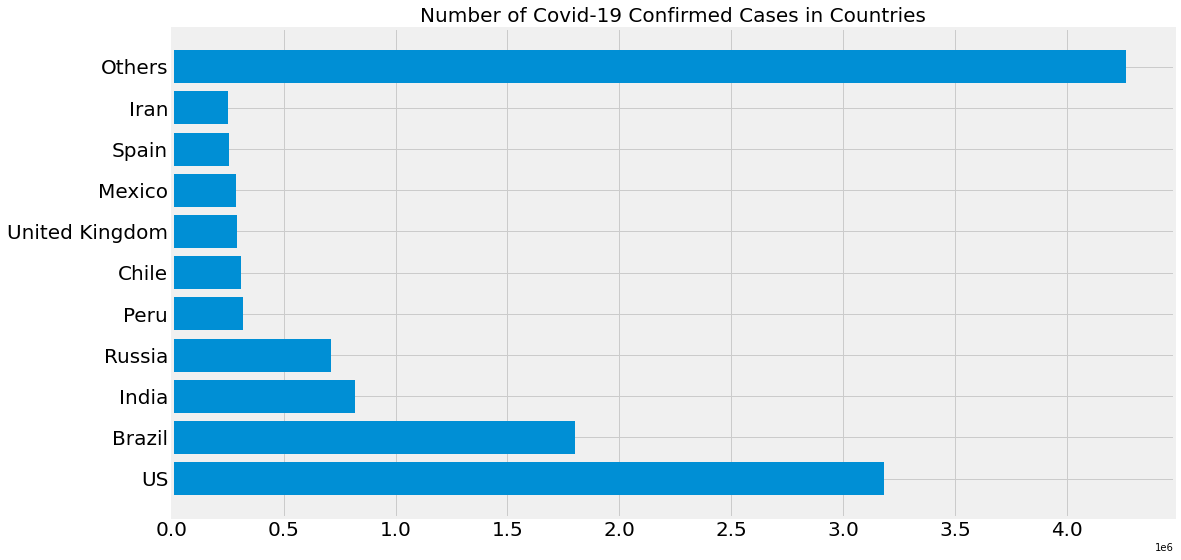

In [ ]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries')

In [125]:
def plot_pie_charts(x, y, title):
  c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
  plt.figure(figsize=(20,15))
  plt.title(title, size=20)
  plt.pie(y, colors=c)
  plt.legend(x, loc='best', fontsize=15)
  plt.show()


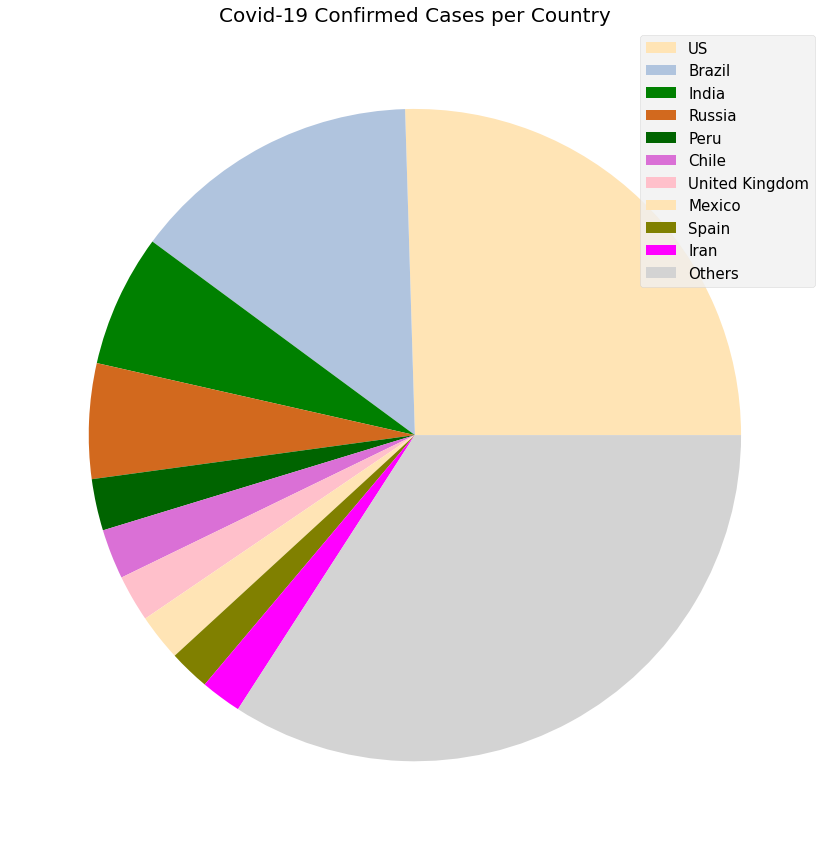

In [126]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

# Top 10 provinces with most confirmed covid-19 cases

In [ ]:
#10 provinces with most confirmed cases
visual_unique_provinces = []
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])

for i in range(len(province_confirmed_cases[:10])):
  visual_unique_provinces.append(unique_provinces[i])
  visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others') 
visual_confirmed_cases2.append(others) 

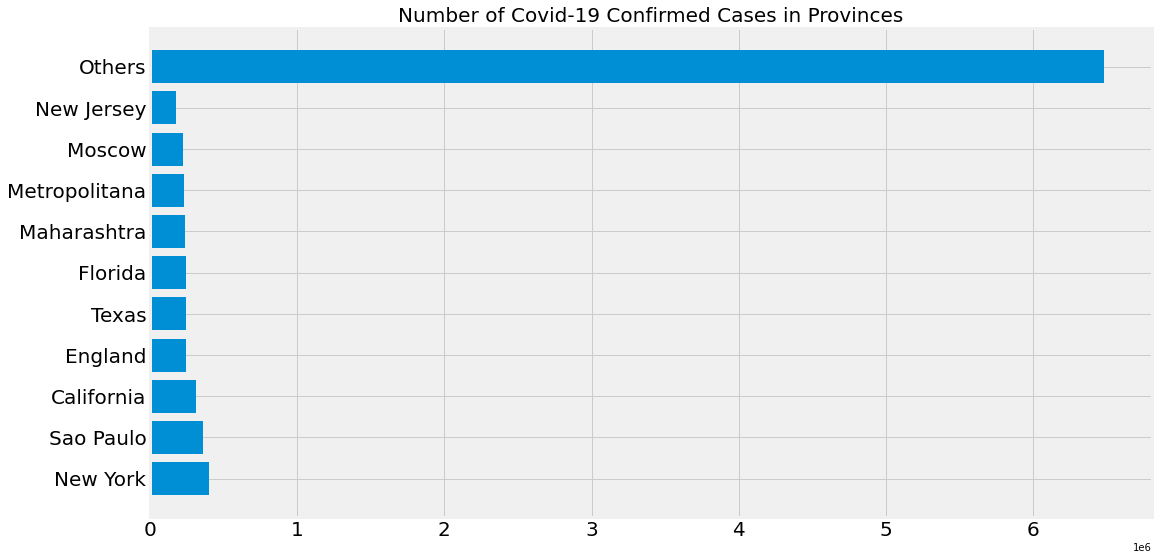

In [ ]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Covid-19 Confirmed Cases in Provinces')

#Building the model for future forcast

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [ ]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

# Converting integers into date time values

In [123]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+ datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Spliting Data into Train & Test

**Using 75% of the data to train the model and the rest of 25% of data for testing the moodel**

In [122]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)

# Polynomial Regression Model & Prediction


In [ ]:
#transforming data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_fofrecast = poly.fit_transform(future_forecast)

In [ ]:
#building polynomial regression model using linear regression function
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_fofrecast)

print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 203983.96950485205
MSE: 67112703151.58807


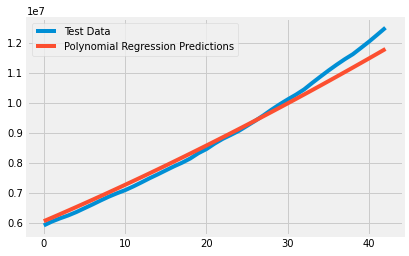

In [ ]:
#visualising hvalues of test datasets and prediction of polynomial regression model
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

# SVM Model & Prediction

In [ ]:
#using support vector machine (SVM)
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 9466616.54067596
MSE: 119054956046625.25


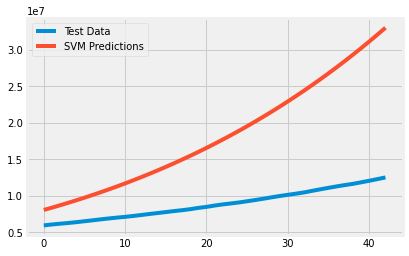

In [ ]:
#building SVM model

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])

print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))

# Visualization of Covid-19 Cases Over Time

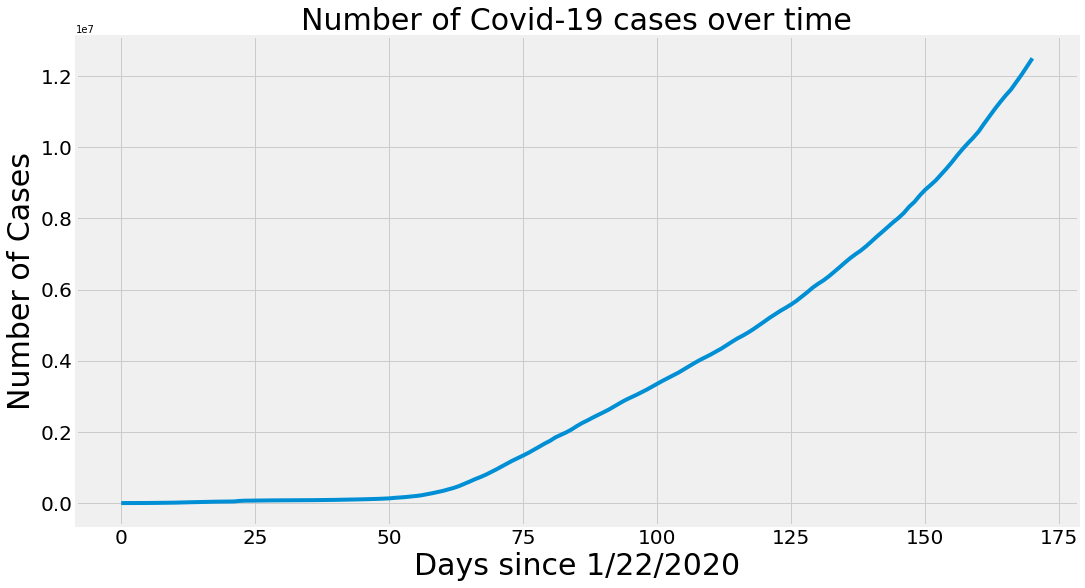

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Covid-19 cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

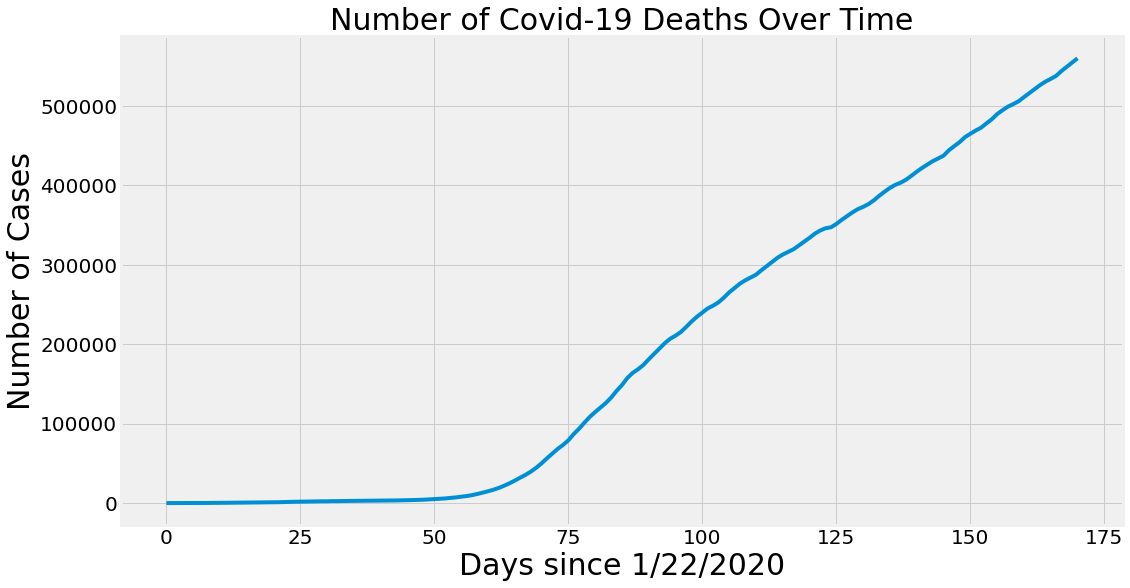

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Covid-19 Deaths Over Time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

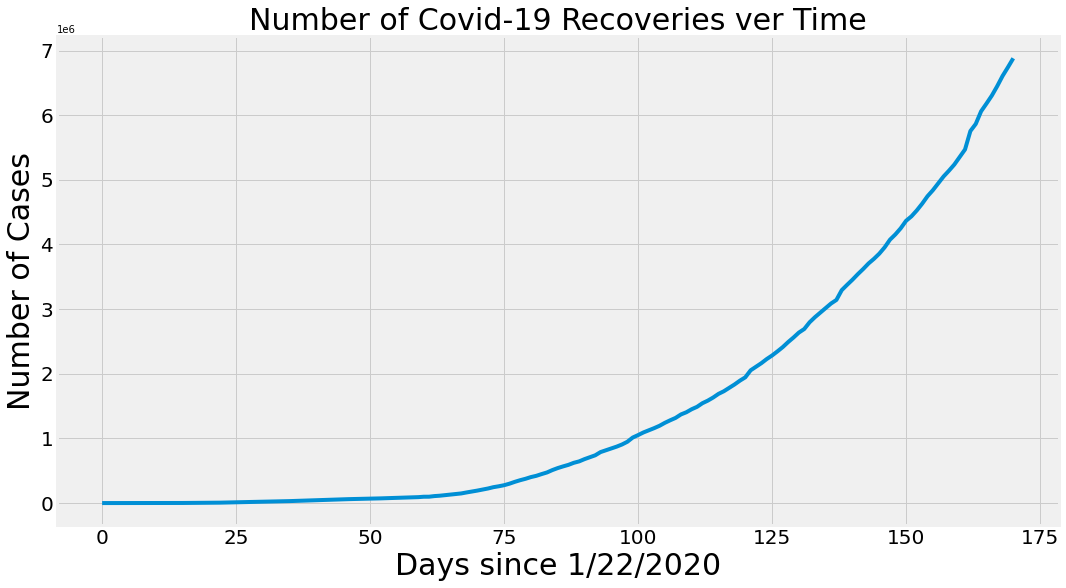

In [68]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Covid-19 Recoveries over Time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

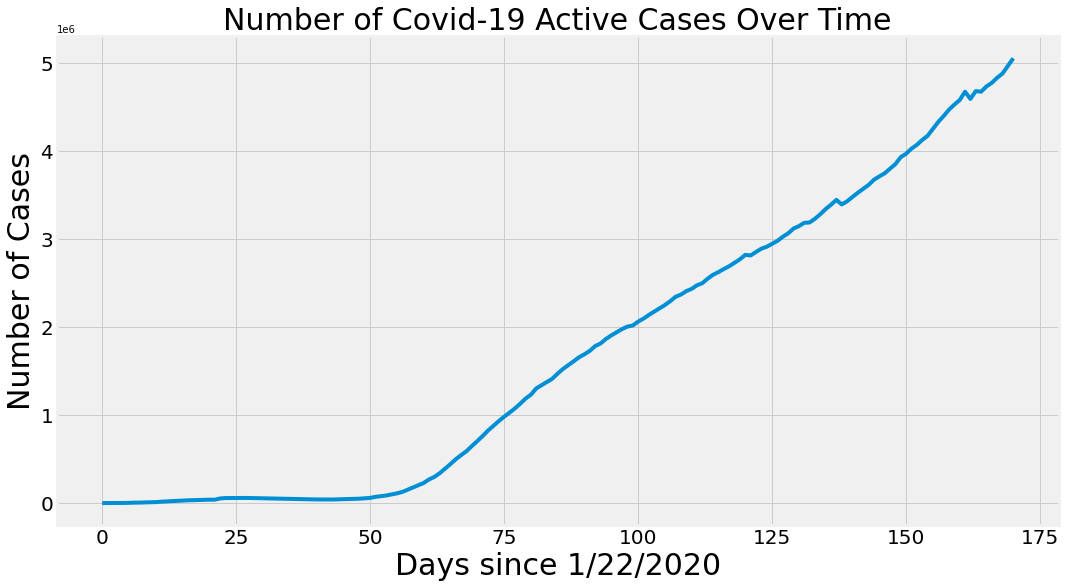

In [69]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Covid-19 Active Cases Over Time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

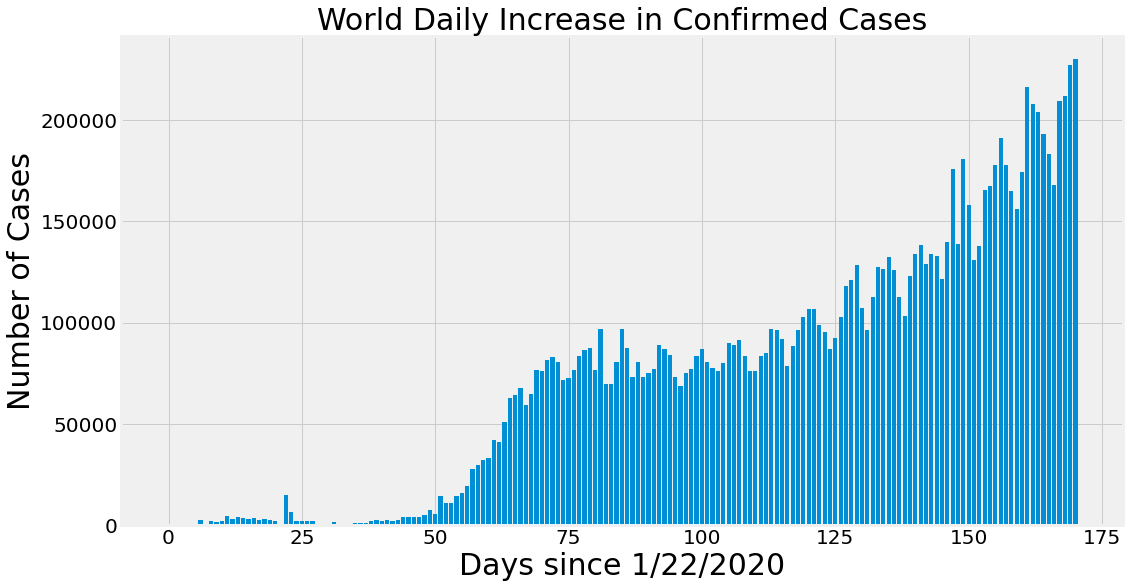

In [72]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increase in Confirmed Cases', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

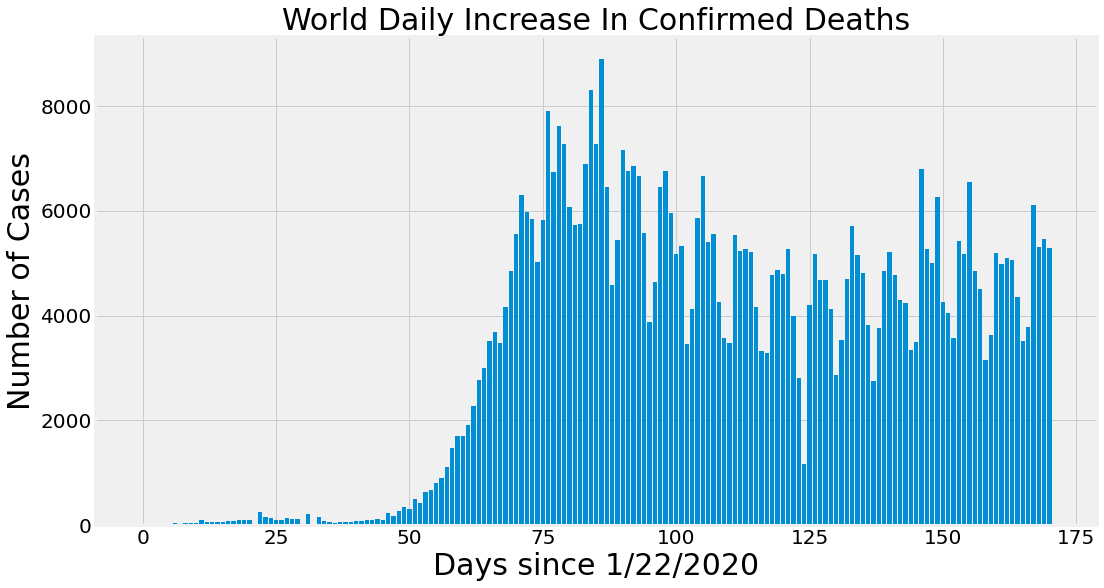

In [73]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increase In Confirmed Deaths', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

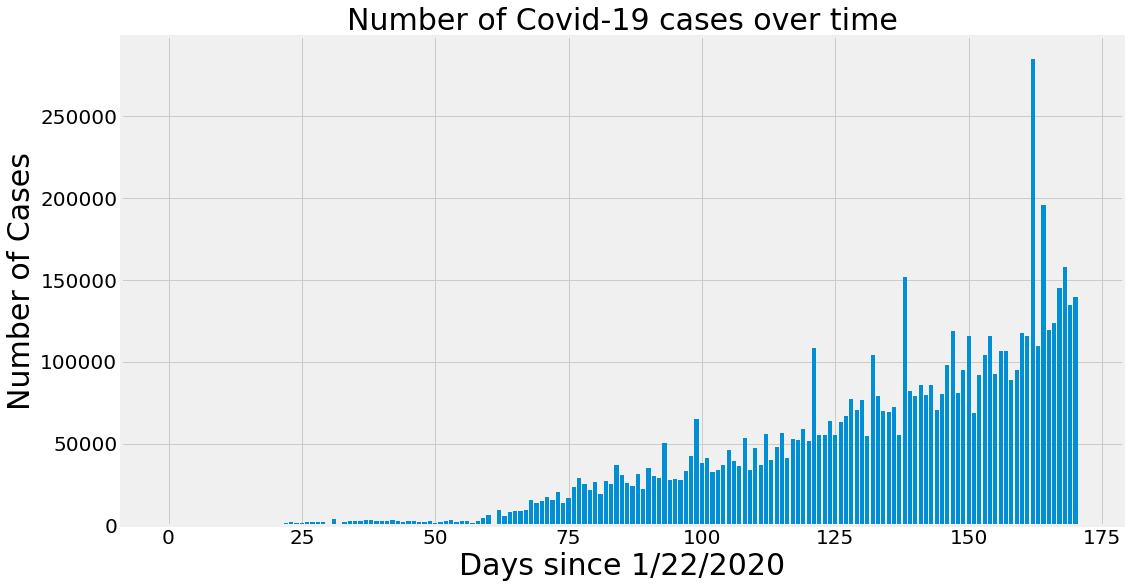

In [74]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('Number of Covid-19 cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Function for Prediction value visualization 

In [75]:
def plot_predictions(x, y, pred, algo_name, color):
  plt.figure(figsize=(16,9))
  plt.plot(x, y)
  plt.plot(future_forecast, pred, linestyle='dashed', color=color)
  plt.title('Number of Covid-19 Cases Over Time', size=30)
  plt.xlabel('Days since 1/22/2020', size=30)
  plt.ylabel('Number of Cases', size=30)
  plt.legend(['Conffirmed Cases', algo_name], prop={'size': 20})
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

# Polynomial Regression prediction vs. confirmed cases

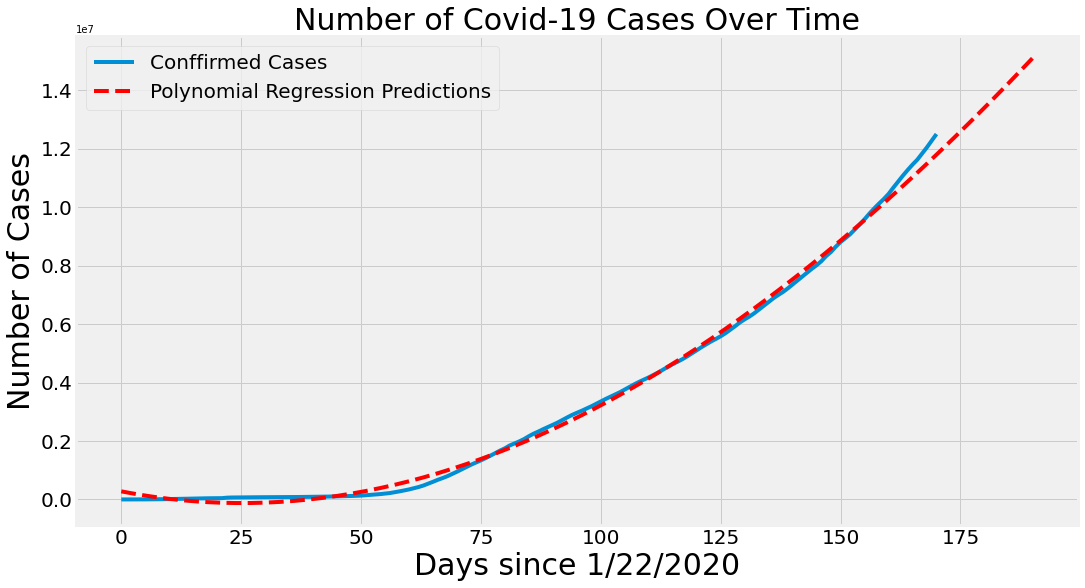

In [121]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

# Support Vector Machine (SVM) Prediction vs. Confirmed Cases

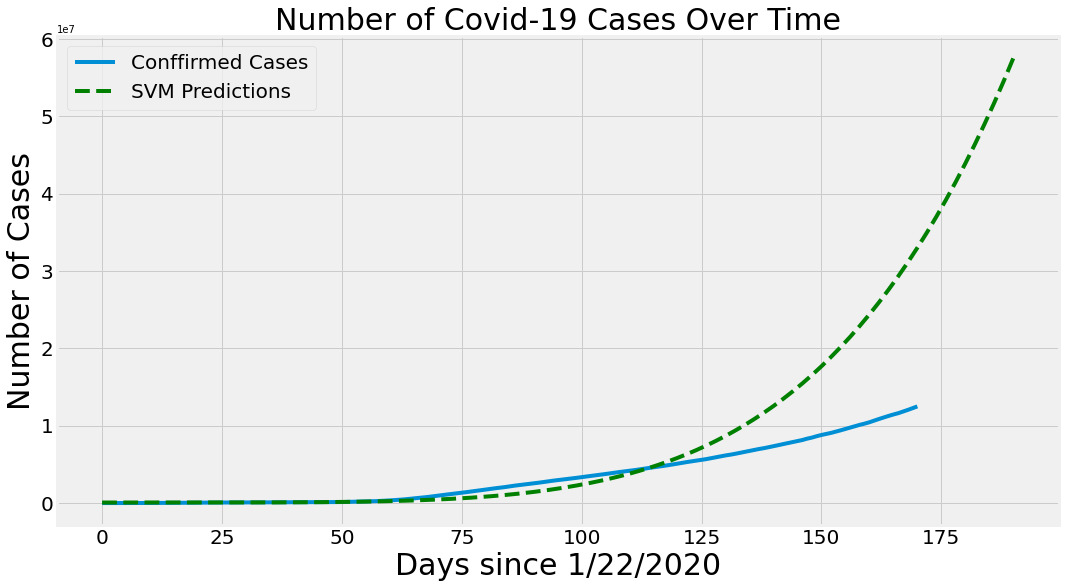

In [120]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

# Putting predicted values from models into dataframe

In [95]:
#printing predicted values from polynomial regression as a dataframe

linear_pred = linear_pred.reshape(1, -1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases worldwide
0,07/11/2020,11948905.0
1,07/12/2020,12106231.0
2,07/13/2020,12264453.0
3,07/14/2020,12423568.0
4,07/15/2020,12583573.0
5,07/16/2020,12744467.0
6,07/17/2020,12906247.0
7,07/18/2020,13068910.0
8,07/19/2020,13232455.0
9,07/20/2020,13396878.0


In [96]:
#printing predicted values from SVM as a dataframe

svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM predicted number of Confirmed Cases worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM predicted number of Confirmed Cases worldwide
0,07/11/2020,33990385.0
1,07/12/2020,34993828.0
2,07/13/2020,36020881.0
3,07/14/2020,37071957.0
4,07/15/2020,38147476.0
5,07/16/2020,39247860.0
6,07/17/2020,40373540.0
7,07/18/2020,41524948.0
8,07/19/2020,42702523.0
9,07/20/2020,43906709.0


# Deanth & Recoveries Over Time

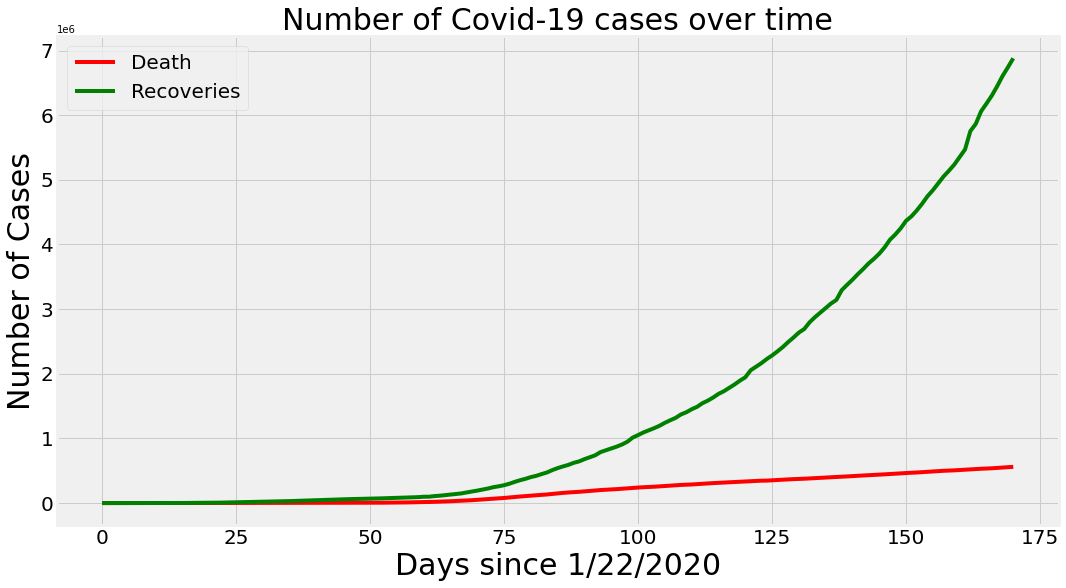

In [97]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['Death', 'Recoveries'], loc='best', fontsize=20)
plt.title('Number of Covid-19 cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Number of Covid-19 Deaths vs. Recoveries Case

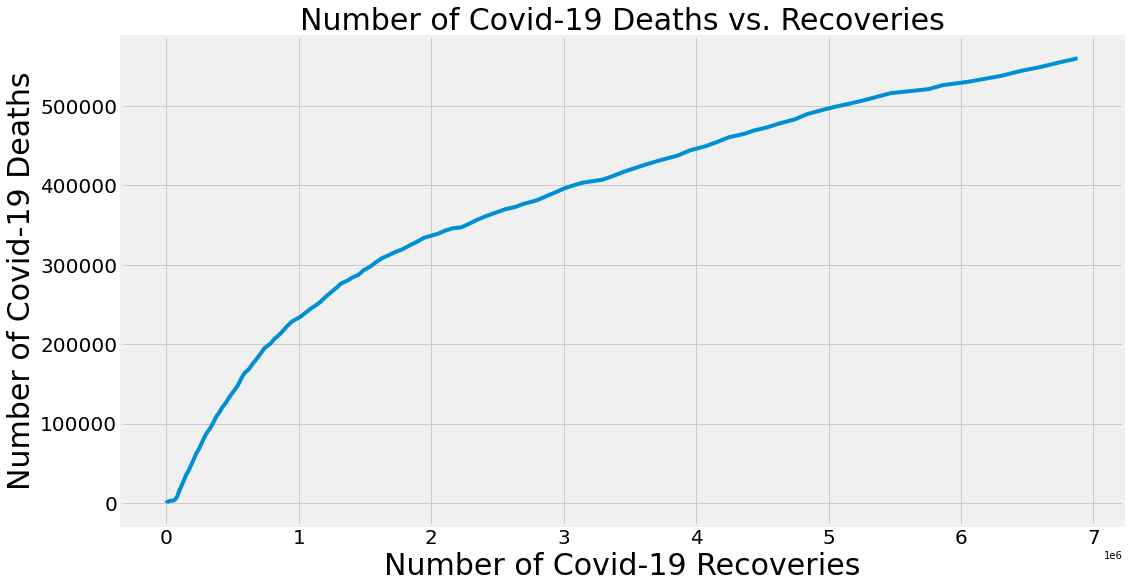

In [98]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Covid-19 Deaths vs. Recoveries Cases', size=30)
plt.xlabel('Number of Covid-19 Recoveries', size=30)
plt.ylabel('Number of Covid-19 Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Country wise daily increase of Covid-19 cases


1.   Confirmed Cases
2.   Daily increase in Confirmed Cases
3.   Daily increase in Deaths
4.   Daily increase in Recoveries




In [109]:
def country_plot(x, y1, y2, y3, y4, country):
  plt.figure(figsize=(16, 9))
  plt.plot(x, y1)
  plt.title('{} Confirmed Cases'.format(country), size=30)
  plt.xlabel('Days since 1/22/2020', size=30)
  plt.ylabel('Number of Cases', size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

  plt.figure(figsize=(16, 9))
  plt.bar(x, y2)
  plt.title('{} Daily Increase in Confirmed Cases'.format(country), size=30)
  plt.xlabel('Days since 1/22/2020', size=30)
  plt.ylabel('Number of Cases', size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

  plt.figure(figsize=(16, 9))
  plt.bar(x, y3)
  plt.title('{} Daily Increase in Deaths'.format(country), size=30)
  plt.xlabel('Days since 1/22/2020', size=30)
  plt.ylabel('Number of Cases', size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

  plt.figure(figsize=(16, 9))
  plt.bar(x, y4)
  plt.title('{} Daily Increase in Recoveries'.format(country), size=30)
  plt.xlabel('Days since 1/22/2020', size=30)
  plt.ylabel('Number of Cases', size=30)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.show()

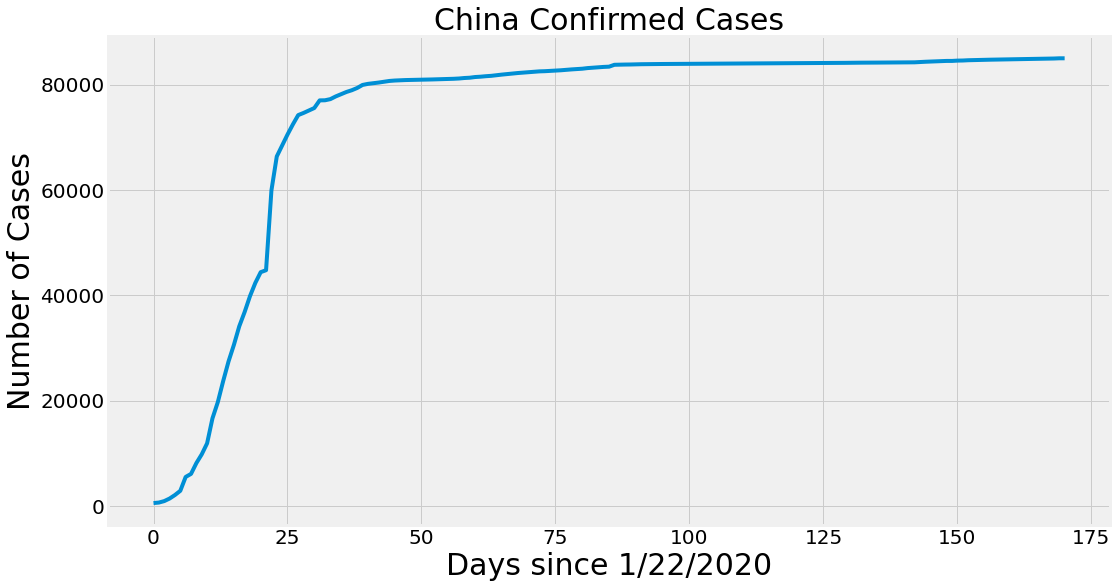

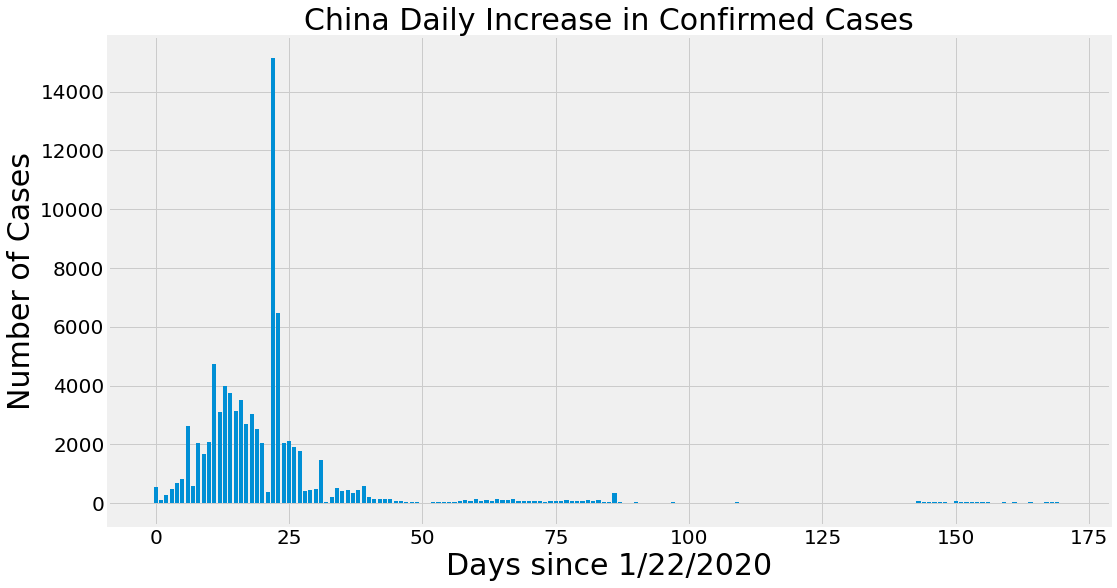

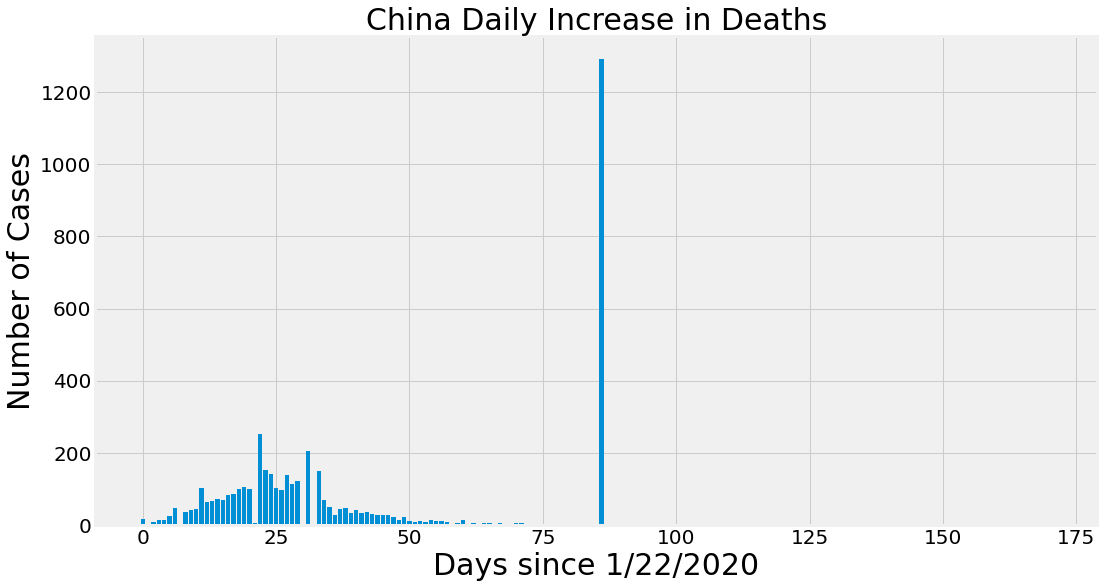

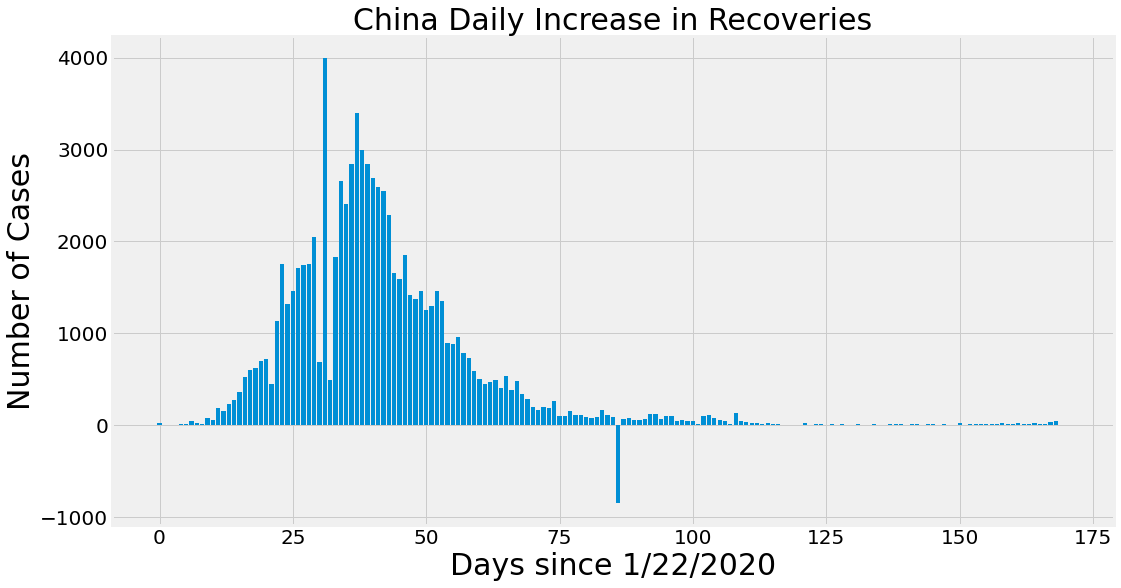

In [110]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

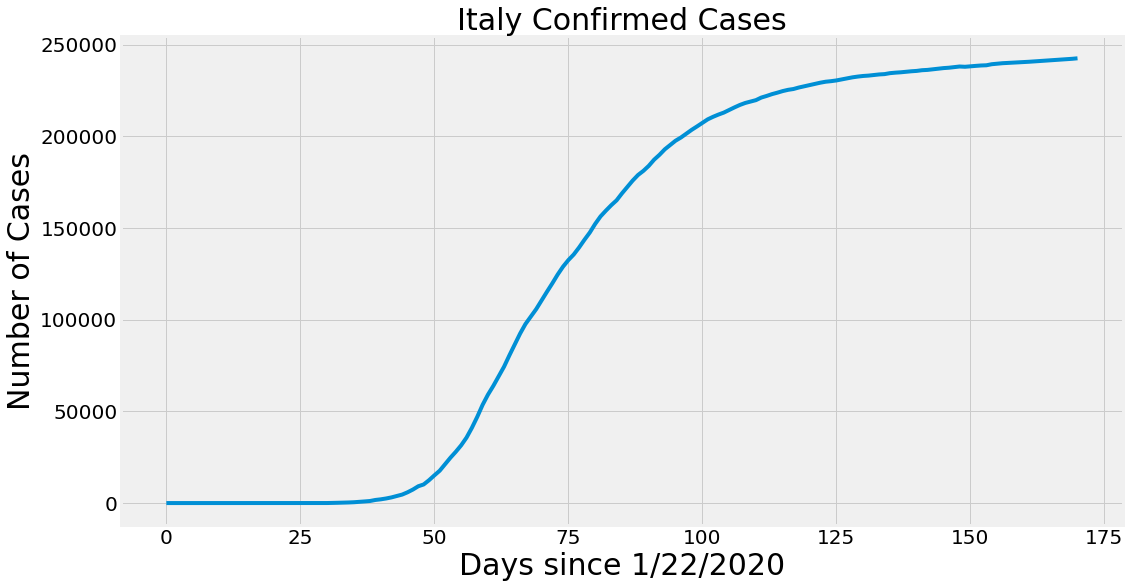

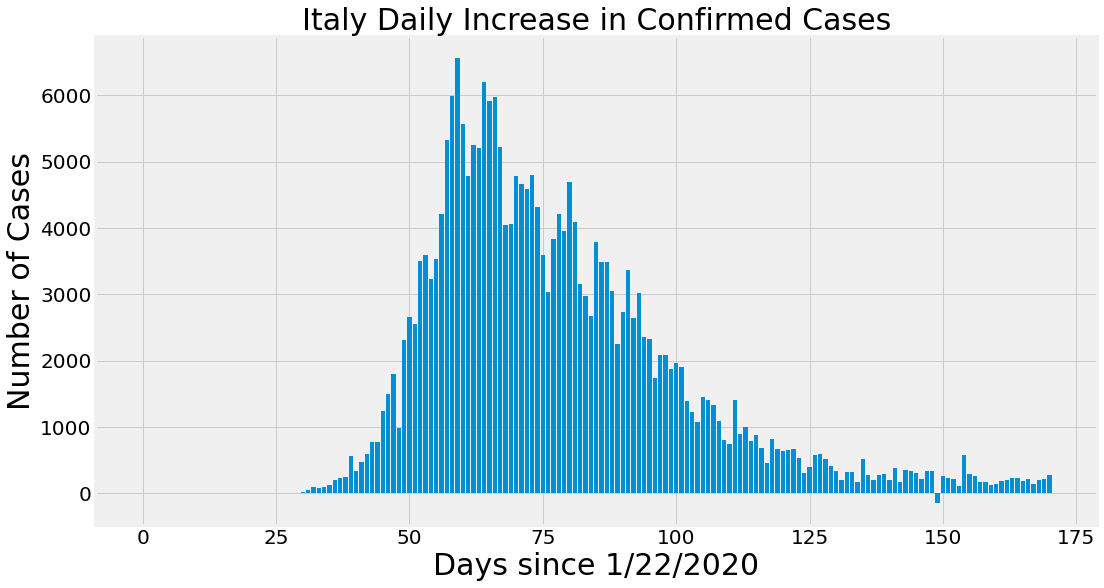

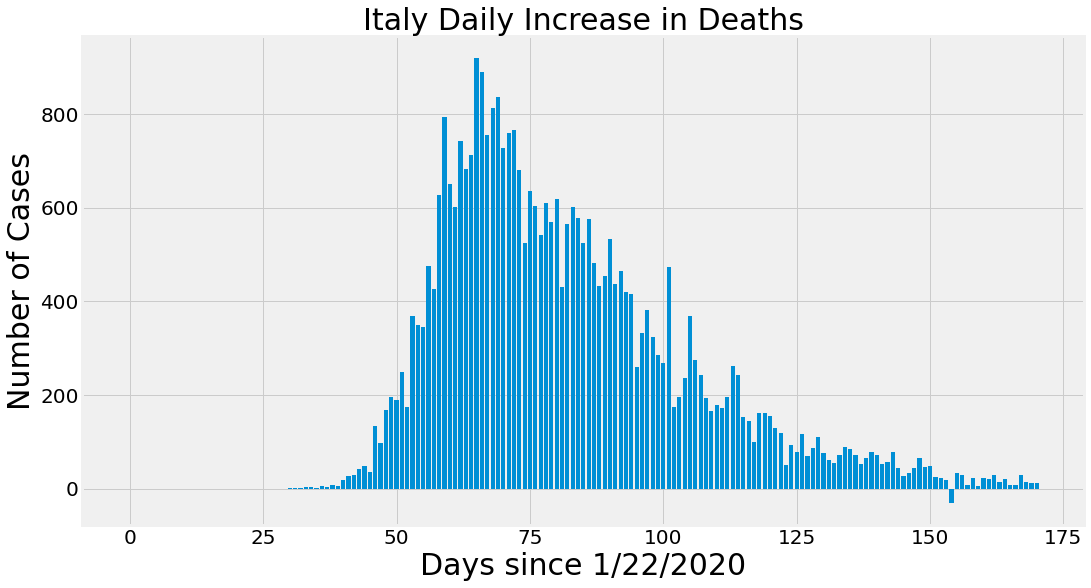

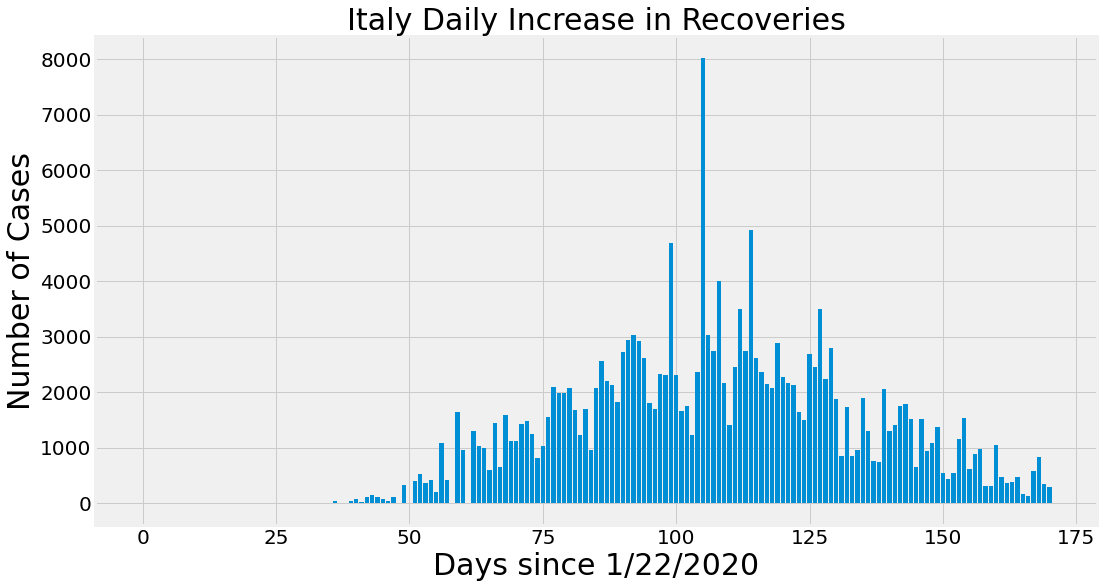

In [111]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

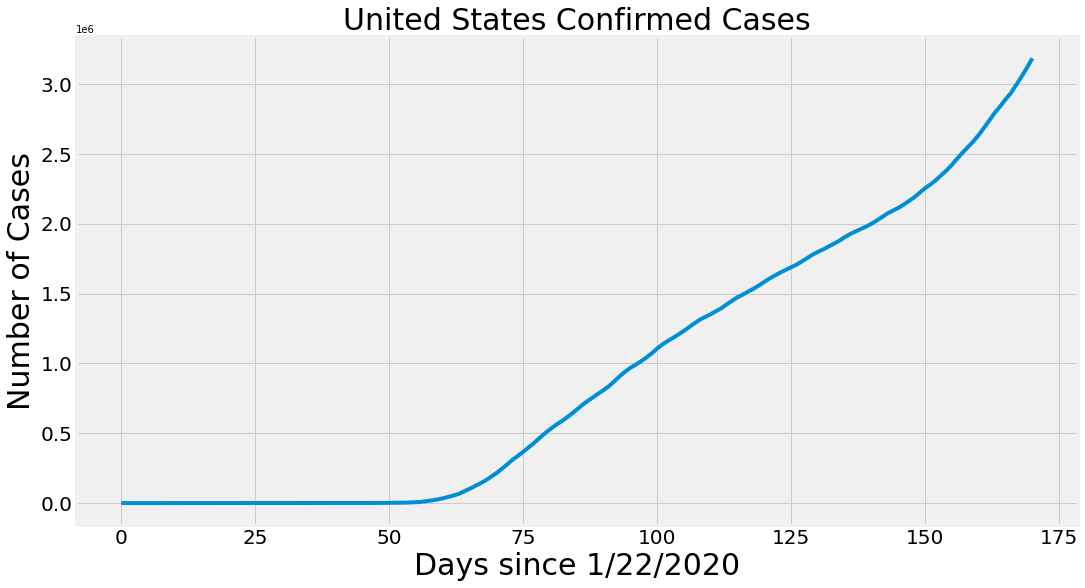

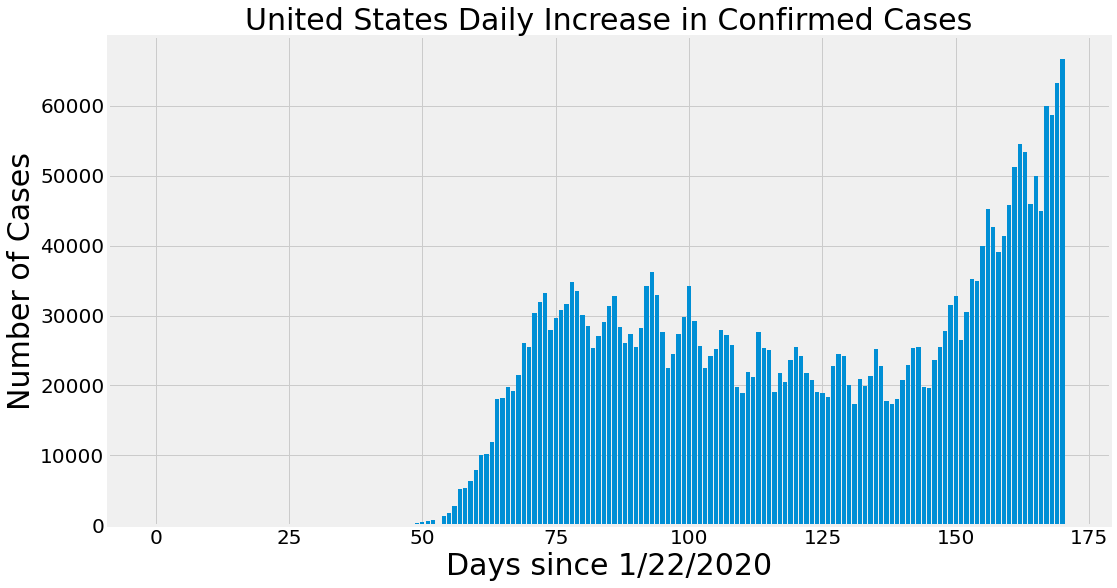

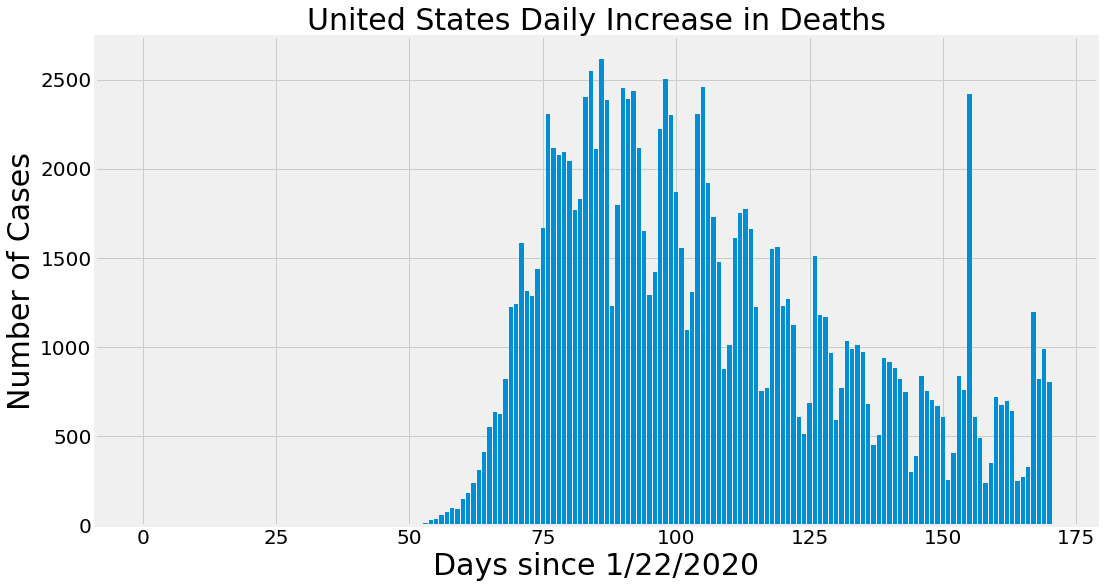

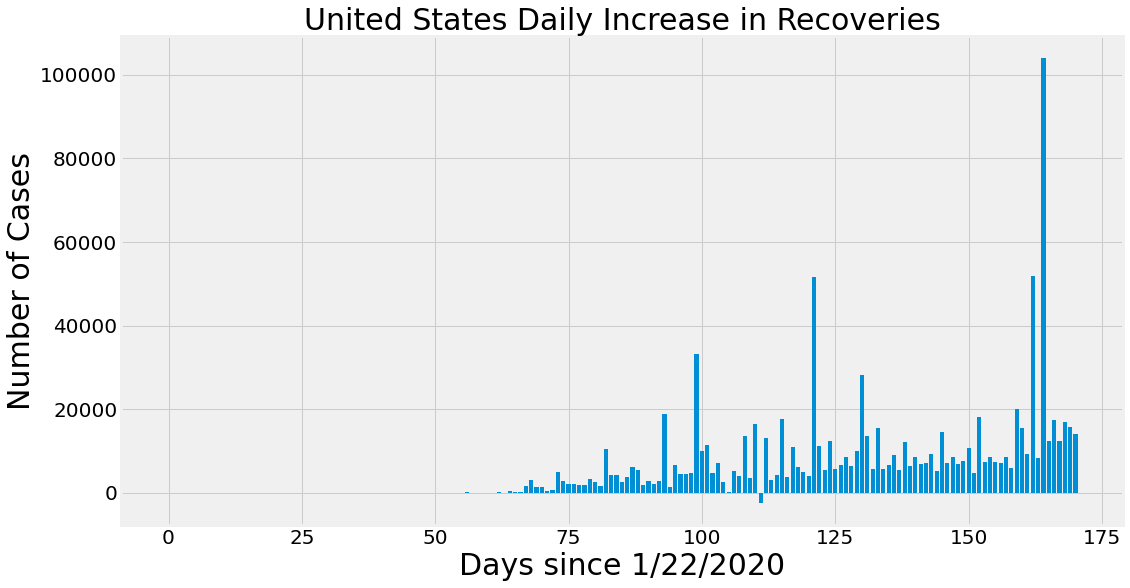

In [112]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

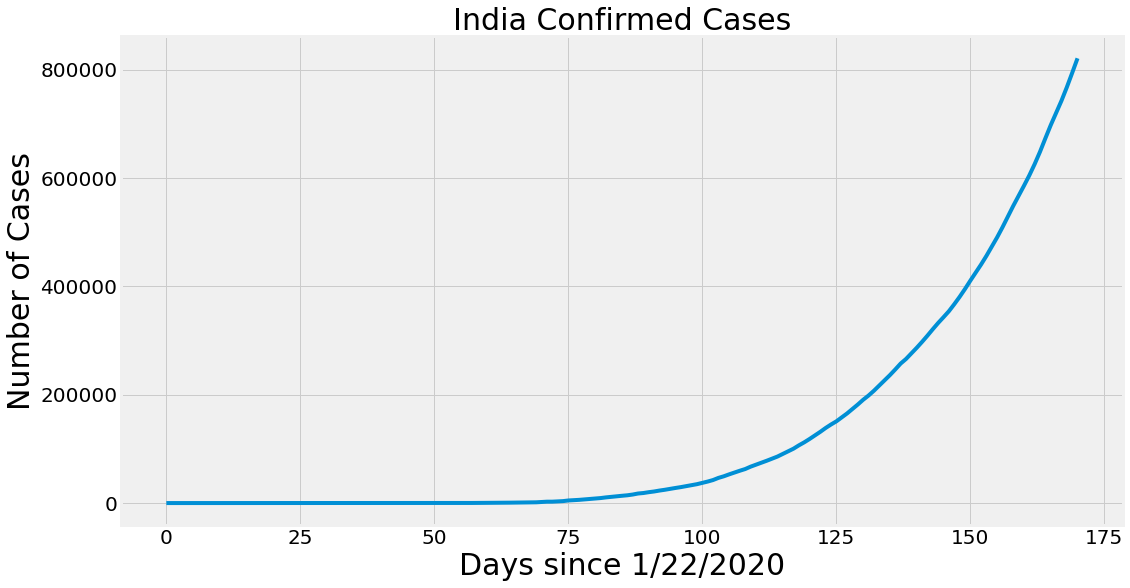

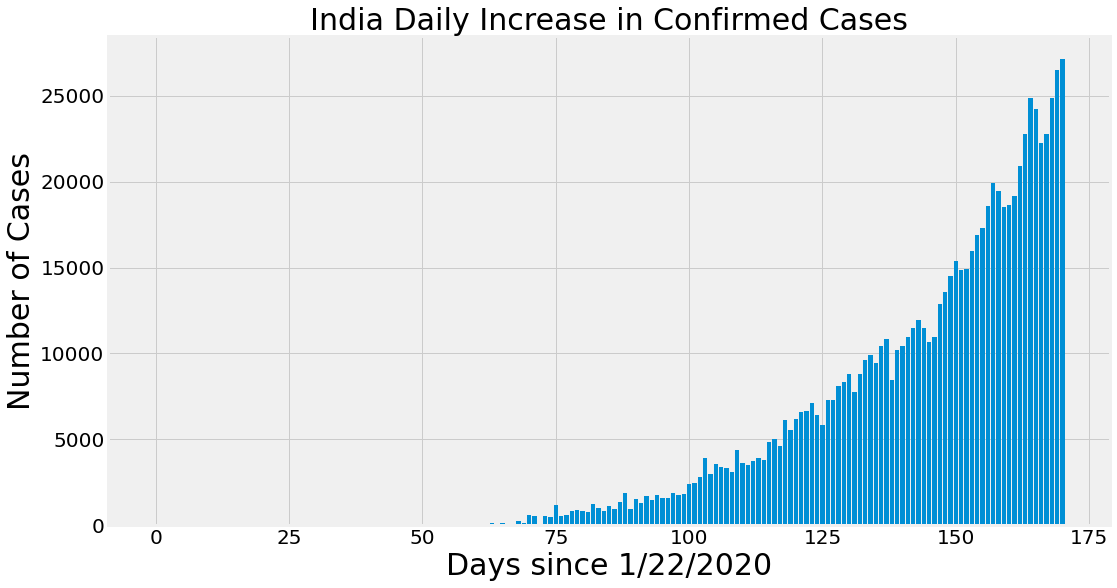

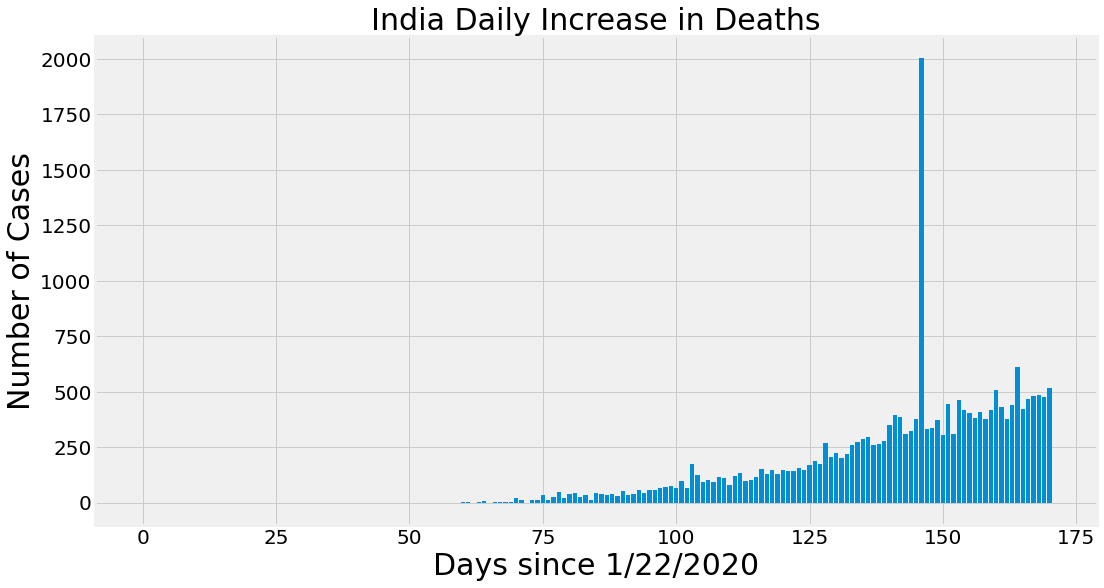

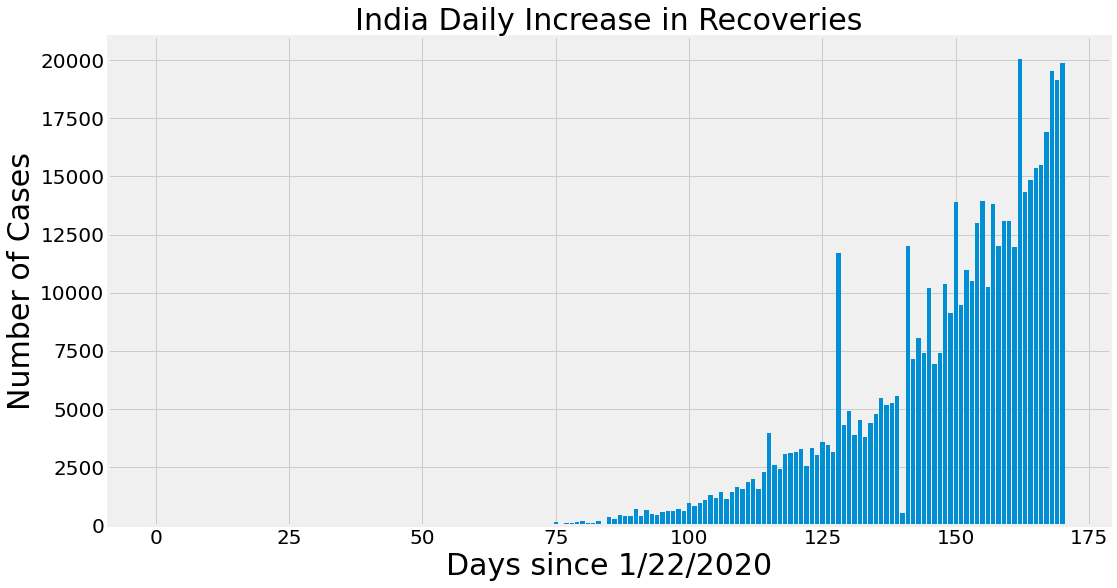

In [113]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

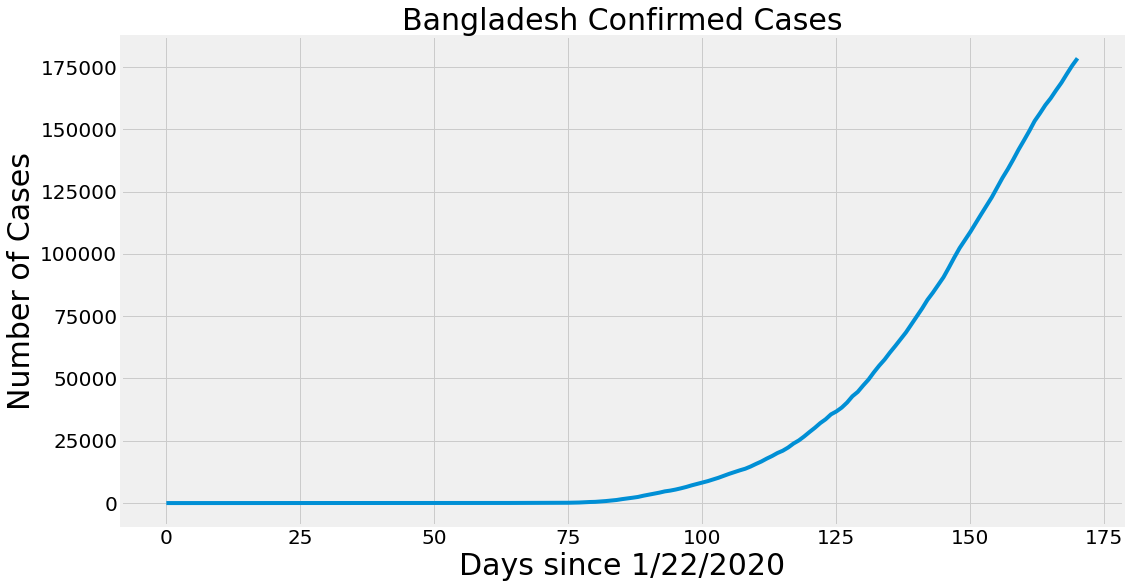

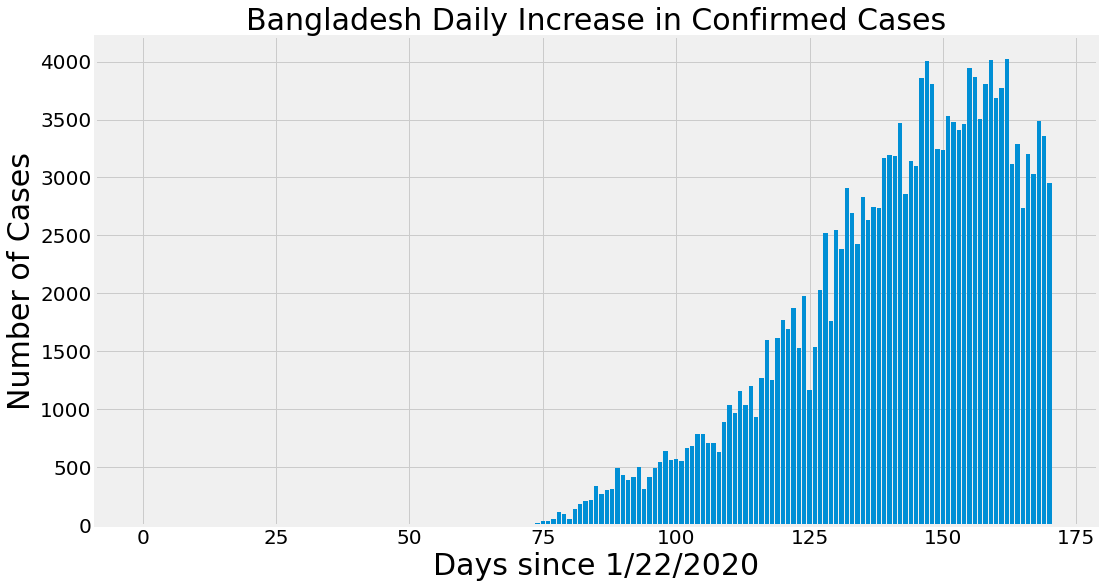

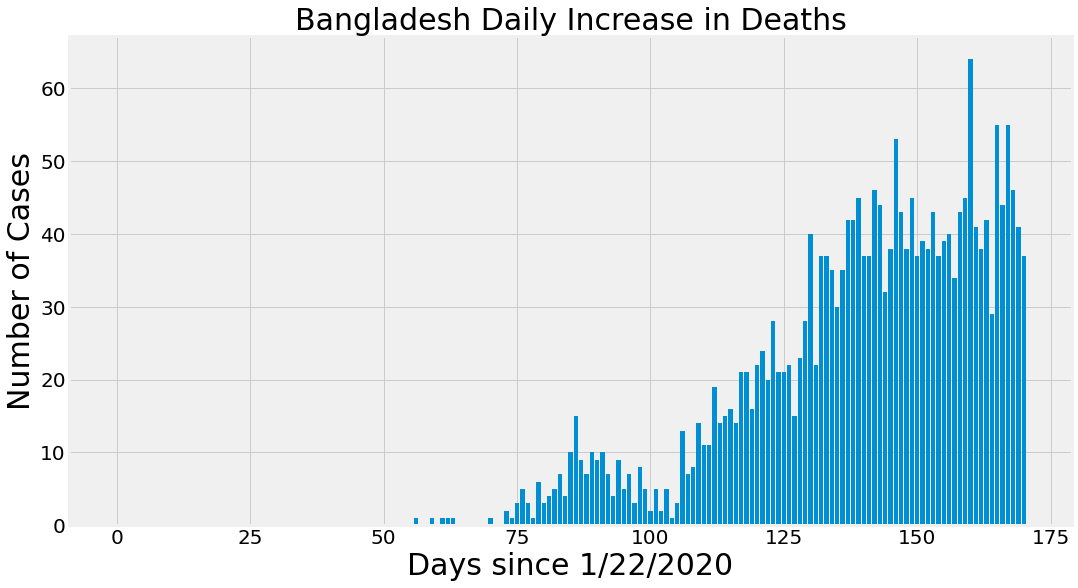

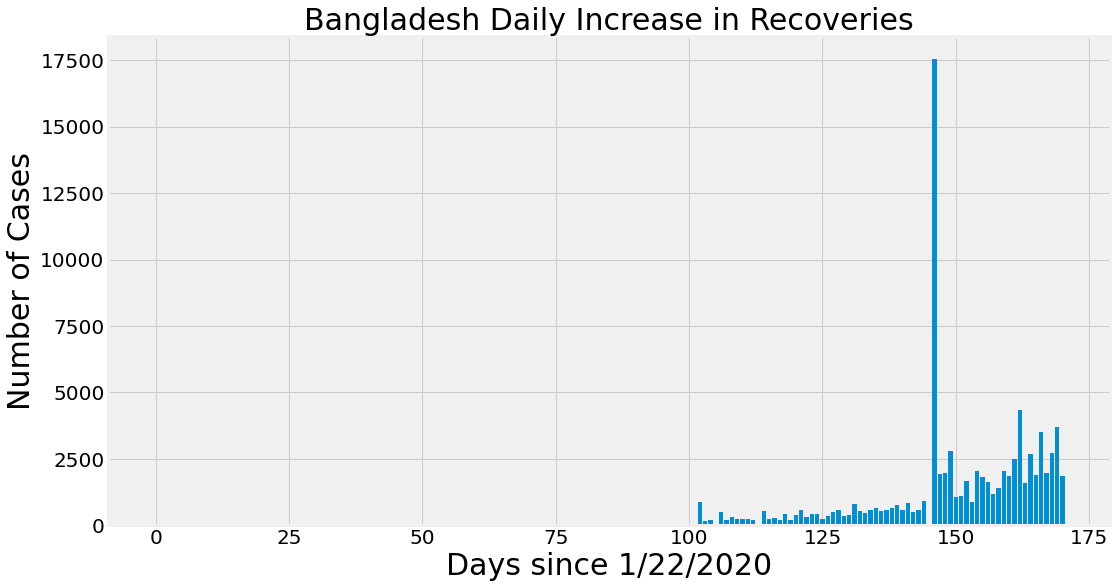

In [114]:
country_plot(adjusted_dates, bangladesh_cases, bangladesh_daily_increase, bangladesh_daily_death, bangladesh_daily_recovery, 'Bangladesh')

# Covid-19 Case visualization 
**Visualising Number of Covid-19 cases, Deaths and recoveries in Different countries**

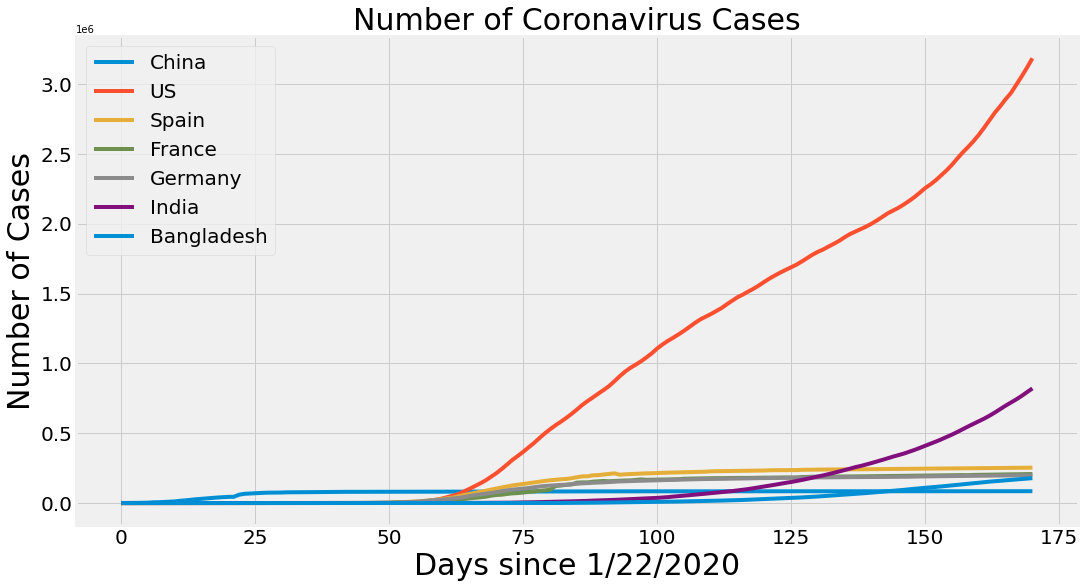

In [116]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.plot(adjusted_dates, bangladesh_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'US', 'Spain', 'France', 'Germany', 'India', 'Bangladesh'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

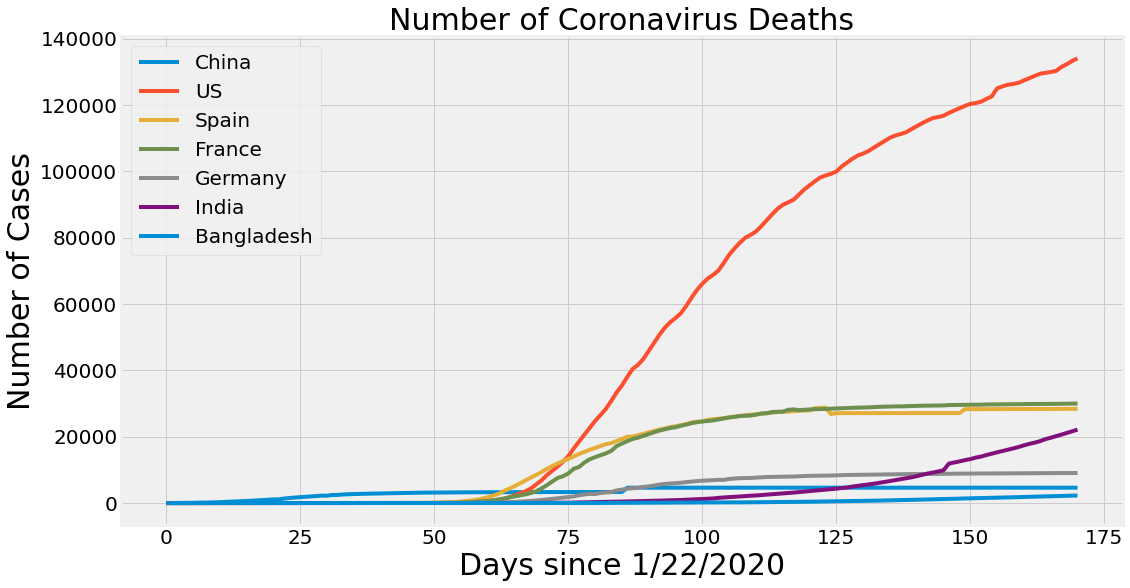

In [117]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.plot(adjusted_dates, bangladesh_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'US', 'Spain', 'France', 'Germany', 'India', 'Bangladesh'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

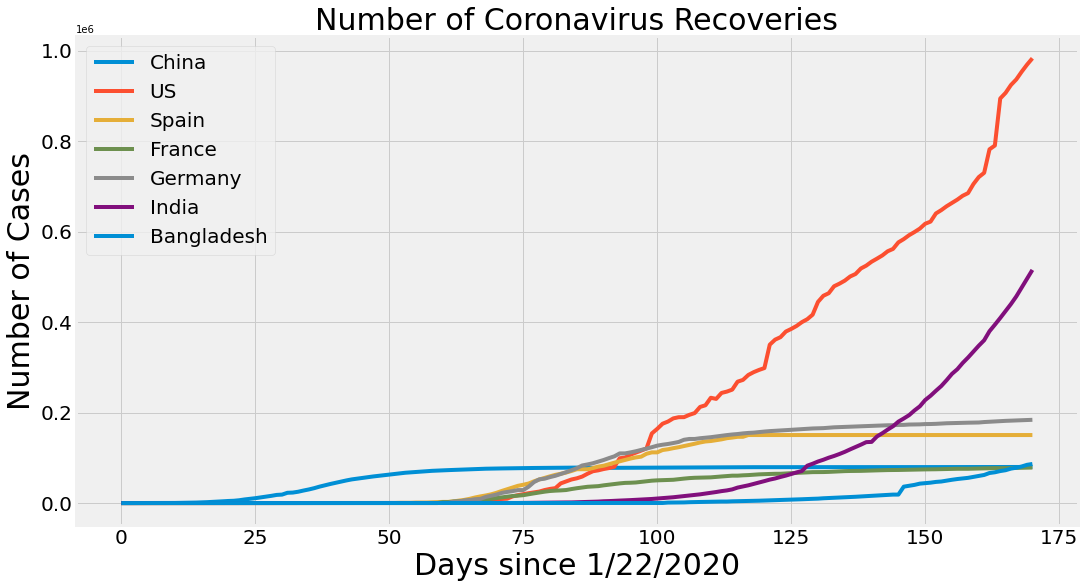

In [118]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.plot(adjusted_dates, bangladesh_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'US', 'Spain', 'France', 'Germany', 'India', 'Bangladesh'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Resources

[CSSEGISandData](https://github.com/CSSEGISandData/COVID-19)